# São Paulo 04/07/2019
## Analisando dados de cirurgias realizadas no DF Brasilia
##### jeferson@asterixsolucoes.com.br 
###### Dados obtidos via portal da transparência em http://dados.df.gov.br/dataset/cirurgias


In [2]:
# Realizando os imports necessarios e configurando a saida do matplotlib para meu notebook
import pandas as pd
%matplotlib inline

In [3]:
# Ao analisar o documento achei interessante analisar apenas as colunas abaixo
# 3 - Hospital, 6- Municipio, 7 - Complexidade, 8 - Carater Atendimento, 12 - Sub Grupo Procedimento, 14- Procedimento
df = pd.read_csv('sih-janeiro-2017-cirurgias-eletiva-e-emergencia.csv', sep=';', encoding='cp1252', usecols=[3,6,7,8,12,14])
#Renomeando as colunas para melhor entendimemto
df.columns = ['Hospital','Municipio','Complexidade','Carater Atendimento','Sub Grupo Procedimento','Procedimento']

In [5]:
#Analisando o inicio do arquivo
df.head(2)

,Hospital,Municipio,Complexidade,Carater Atendimento,Sub Grupo Procedimento,Procedimento
0,6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE A...,"BRASILIA, DF, BR",Média complexidade,Eletivo,Sub Grupo: 15 - Outras cirurgias,TRATAMENTO C/ CIRURGIAS MULTIPLAS
1,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 03 - Cirurgia do sistema nervoso ce...,DERIVACAO VENTRICULAR EXTERNAR-SUBGALEAL EXTERNA


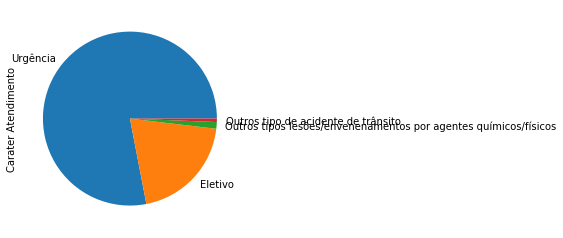

In [6]:
#Agora por curiosidade irei produzir um grafico do tipo Pizza usando a coluna 'Carater de Atendimento'
df['Carater Atendimento'].value_counts().plot.pie()

In [6]:
#Descrevendo os dados
df.describe()

,Hospital,Municipio,Complexidade,Carater Atendimento,Sub Grupo Procedimento,Procedimento
count,4862,4862,4862,4862,4862,4862
unique,16,11,2,4,16,495
top,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
freq,735,1923,4353,3794,1539,1060


##### Breve explicação dos dados exibidos pelo comando df.describe() </br>
A linha **count** exibe o numero de linhas do Data Frame **4862**. </br>

**unique** mostra os valores unicos encontrados no Data Frame **16** é o valor de Hospitais encontrados no Data Frame. </br>

**top** já exibe o valor mais encontrado para a coluna. </br>

**freq** exibibe o numero de registros encontrados no **top** ou seja; </br>

>Houve **3794** atendimentos que na coluna **Carater Atendimento** a classificação era **Urgência**. </br>

>Outro exemplo é na coluna **Procedimento** que exibe **Parto Cesariano** com **1060** registros. </br>


In [13]:
#Listando os hospitais contidos nos dados
df['Hospital'].unique()

array(['6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE ALENCAR HCB',
       '0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL',
       '0010499 HRT HOSPITAL REGIONAL DE TAGUATINGA', '0010545 HRBZ',
       '0010480 HOSPITAL REGIONAL DE CEILANDIA',
       '3276678 INSTITUTO DE CARDIOLOGIA DO DISTRITO FEDERAL',
       '0010472 HRG', '0010510 HOSPITAL UNIVERSITARIO DE BRASILIA',
       '0010529 HRPL',
       '0010537 HOSPITAL MATERNO INFANTIL DE BRASILIA HMIB',
       '3055450 CBV CENTRO BRASILEIRO DA VISAO',
       '2672197 HRSAM HOSPITAL REGIONAL DE SAMAMBAIA', '0010502 HRS',
       '5717515 HRSM', '2645157 HRPA', '0010464 HRAN'], dtype=object)

In [23]:
#Quantas cirurgias foram realizadas em cada hospital
df['Hospital'].value_counts()

0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL           735
0010472 HRG                                                 555
0010480 HOSPITAL REGIONAL DE CEILANDIA                      461
0010464 HRAN                                                432
0010499 HRT HOSPITAL REGIONAL DE TAGUATINGA                 373
0010510 HOSPITAL UNIVERSITARIO DE BRASILIA                  350
2645157 HRPA                                                327
0010537 HOSPITAL MATERNO INFANTIL DE BRASILIA HMIB          298
5717515 HRSM                                                281
0010529 HRPL                                                256
0010502 HRS                                                 225
2672197 HRSAM HOSPITAL REGIONAL DE SAMAMBAIA                195
3276678 INSTITUTO DE CARDIOLOGIA DO DISTRITO FEDERAL        191
0010545 HRBZ                                                 75
6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE ALENCAR HCB     74
3055450 CBV CENTRO BRASILEIRO DA VISAO  

In [26]:
#Quantas cirurgias por Sub Grupo Procedimento 
df['Sub Grupo Procedimento'].value_counts()

Sub Grupo: 11 - Cirurgia obstétrica                                                   1539
Sub Grupo: 07 - Cirurgia do aparelho digestivo, orgãos anexos e parede abdominal       893
Sub Grupo: 08 - Cirurgia do sistema osteomuscular                                      651
Sub Grupo: 09 - Cirurgia do aparelho geniturinário                                     474
Sub Grupo: 06 - Cirurgia do aparelho circulatório                                      299
Sub Grupo: 15 - Outras cirurgias                                                       223
Sub Grupo: 04 - Cirurgia das vias aéreas superiores, da cabeça e do pescoço            145
Sub Grupo: 03 - Cirurgia do sistema nervoso central e periférico                       141
Sub Grupo: 16 - Cirurgia em oncologia                                                  110
Sub Grupo: 05 - Cirurgia do aparelho da visão                                           98
Sub Grupo: 12 - Cirurgia torácica                                                       92

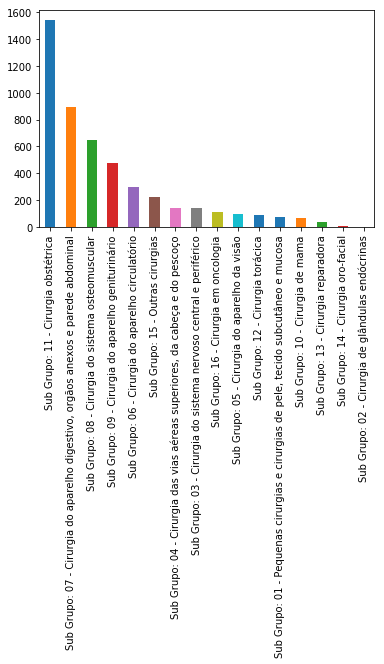

In [31]:
#Plotando o grafico para ilustrar os dados 
df['Sub Grupo Procedimento'].value_counts().plot.bar()

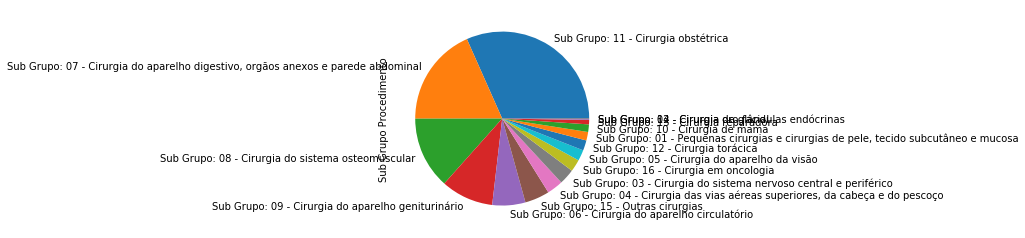

In [33]:
#Plotando um grafico de pizza para ilustrar
df['Sub Grupo Procedimento'].value_counts().plot.pie()

In [38]:
# vamos criar um subconjunto dos dados originais
df_hospbase = df[df['Hospital'] == '0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL']
df_hospbase.describe()

,Hospital,Municipio,Complexidade,Carater Atendimento,Sub Grupo Procedimento,Procedimento
count,735,735,735,735,735,735
unique,1,1,2,4,15,242
top,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,TRATAMENTO C/ CIRURGIAS MULTIPLAS
freq,735,735,551,361,156,47


In [42]:
# Listando linhas aleatorias
df_hospbase.sample(12)

,Hospital,Municipio,Complexidade,Carater Atendimento,Sub Grupo Procedimento,Procedimento
2010,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Outros tipo de acidente de trânsito,Sub Grupo: 03 - Cirurgia do sistema nervoso ce...,TRATAMENTO CIRURGICO DE HEMATOMA SUBDURAL AGUDO
1315,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Eletivo,Sub Grupo: 09 - Cirurgia do aparelho geniturin...,INSTALACAO ENDOSCOPICA DE CATETER DUPLO J
2070,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 15 - Outras cirurgias,TRATAMENTO C/ CIRURGIAS MULTIPLAS
1835,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Eletivo,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,TRATAMENTO CIRÚRGICO DE PSEUDARTROSE / RETARDO...
1659,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Alta complexidade,Urgência,Sub Grupo: 03 - Cirurgia do sistema nervoso ce...,MICROCIRURGIA CEREBRAL ENDOSCOPICA
1533,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 03 - Cirurgia do sistema nervoso ce...,TRATAMENTO CIRURGICO DE HEMATOMA SUBDURAL AGUDO
239,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 01 - Pequenas cirurgias e cirurgias...,EXERESE DE CISTO DERMOIDE
890,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Alta complexidade,Urgência,Sub Grupo: 03 - Cirurgia do sistema nervoso ce...,CRANIOTOMIA PARA RETIRADA DE TUMOR CEREBRAL IN...
1804,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Alta complexidade,Eletivo,Sub Grupo: 03 - Cirurgia do sistema nervoso ce...,MICROCIRURGIA PARA TUMOR INTRACRANIANO (COM TE...
2369,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 07 - Cirurgia do aparelho digestivo...,COLECISTECTOMIA


In [46]:
# Quantidade de procedimentos realizados no Hospital de Base
df_hospbase['Procedimento'].value_counts()

TRATAMENTO C/ CIRURGIAS MULTIPLAS                                                                   47
TRAQUEOSTOMIA                                                                                       28
DERIVACAO VENTRICULAR PARA PERITONEO / ATRIO / PLEURA / RAQUE                                       26
TORACOSTOMIA COM DRENAGEM PLEURAL FECHADA                                                           23
IMPLANTE DE MARCAPASSO DE CAMARA DUPLA TRANSVENOSO                                                  21
TRATAMENTO CIRURGICO DE HEMATOMA SUBDURAL CRONICO                                                   18
AMPUTACAO / DESARTICULACAO DE MEMBROS INFERIORES                                                    17
TROCA DE GERADOR DE MARCAPASSO DE CAMARA DUPLA                                                      14
FACOEMULSIFICACAO C/ IMPLANTE DE LENTE INTRA-OCULAR DOBRAVEL                                        12
ANGIOPLASTIA CORONARIANA C/ IMPLANTE DE DOIS STENTS                      

In [48]:
# Podemos subdividir o dataframe com base em trechos de strings
df_hospbase[df_hospbase['Procedimento'].str.contains('AMPUTA')].count()

Hospital                  33
Municipio                 33
Complexidade              33
Carater Atendimento       33
Sub Grupo Procedimento    33
Procedimento              33
dtype: int64

In [51]:
# Podemos subdividir o dataframe com base em trechos de strings
df_hospbase[df_hospbase['Procedimento'].str.contains('AMPUTA')]

,Hospital,Municipio,Complexidade,Carater Atendimento,Sub Grupo Procedimento,Procedimento
10,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,AMPUTACAO / DESARTICULACAO DE MEMBROS INFERIORES
62,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,AMPUTAÇÃO / DESARTICULAÇÃO DE DEDO
63,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,AMPUTACAO / DESARTICULACAO DE PE E TARSO
98,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,AMPUTAÇÃO / DESARTICULAÇÃO DE DEDO
125,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,AMPUTACAO / DESARTICULACAO DE PE E TARSO
185,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,AMPUTACAO / DESARTICULACAO DE MEMBROS INFERIORES
186,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Eletivo,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,AMPUTACAO / DESARTICULACAO DE MEMBROS INFERIORES
187,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,AMPUTACAO / DESARTICULACAO DE PE E TARSO
188,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,AMPUTACAO / DESARTICULACAO DE MEMBROS INFERIORES
195,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,AMPUTAÇÃO / DESARTICULAÇÃO DE MEMBROS SUPERIORES


In [61]:
# Agora vamos dividir o dataframe original apenas com preocedimentos de parto Cesariano
df_parto_cesariano = df[df['Procedimento'] == 'PARTO CESARIANO']
#Exibindo as duas primeiras linhas do meu novo dataframe
df_parto_cesariano.head(2)

,Hospital,Municipio,Complexidade,Carater Atendimento,Sub Grupo Procedimento,Procedimento
130,0010545 HRBZ,"BRAZLANDIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
131,0010545 HRBZ,"BRAZLANDIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO


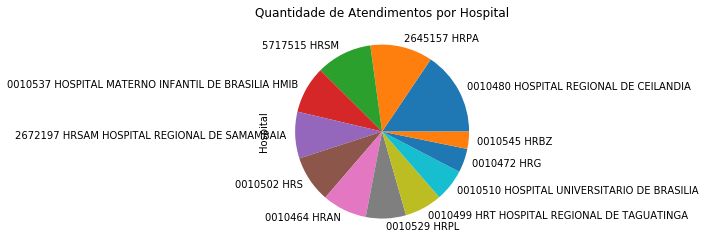

In [73]:
#Exibindo um grafico para ilustrar a quantidade de atendimento por hospital
df_parto_cesariano['Hospital'].value_counts().plot.pie(title='Quantidade de Atendimentos por Hospital')

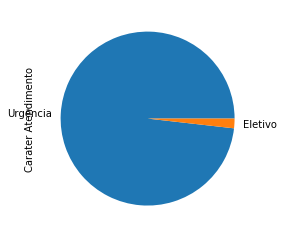

In [64]:
# Verificar a quantidade de paros por Carater de Atendiemnto
df_parto_cesariano['Carater Atendimento'].value_counts().plot.pie()

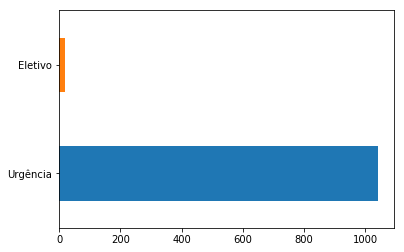

In [66]:
# Vamos plotar o grafico de barras na horizontal
df_parto_cesariano['Carater Atendimento'].value_counts().plot.barh()

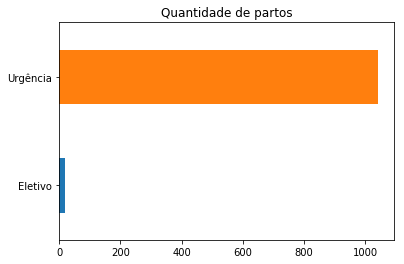

In [71]:
# Melhorando a apresenração do grafico
df_parto_cesariano['Carater Atendimento'].value_counts(ascending=True).plot.barh(title='Quantidade de partos')
